In [8]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the Dataset
data = pd.read_csv('C:\\Users\\sanjh\\Downloads\\spam.csv', encoding='latin1')
# Inspect the dataset
print("Dataset Overview:")
print(data.info())
print(data.head())

# Step 2: Data Cleaning
# Select relevant columns
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

# Encode labels: spam -> 1, ham -> 0
data['label'] = data['label'].map({'spam': 1, 'ham': 0})

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())



Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3     

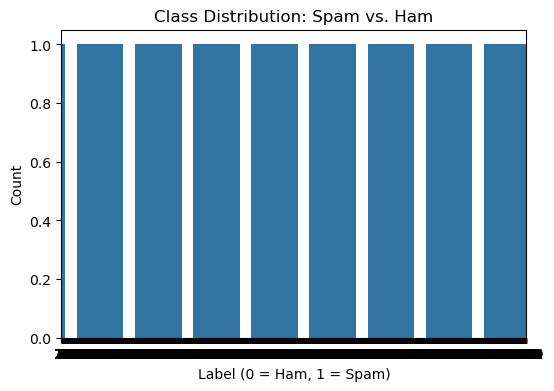

In [9]:
# Step 3: Exploratory Data Analysis (EDA)
# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data['label'])
plt.title('Class Distribution: Spam vs. Ham')
plt.xlabel('Label (0 = Ham, 1 = Spam)')
plt.ylabel('Count')
plt.show()



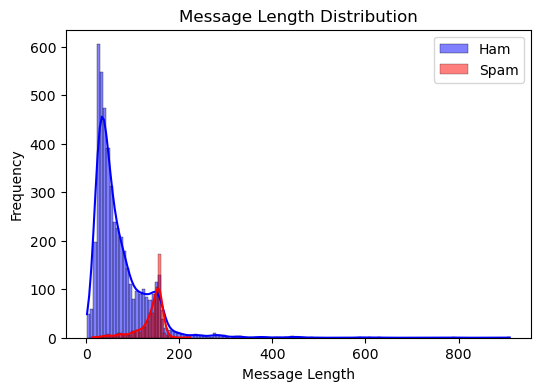

In [10]:
# Message length distribution
data['message_length'] = data['message'].apply(len)
plt.figure(figsize=(6, 4))
sns.histplot(data[data['label'] == 0]['message_length'], color='blue', label='Ham', kde=True)
sns.histplot(data[data['label'] == 1]['message_length'], color='red', label='Spam', kde=True)
plt.title('Message Length Distribution')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [11]:
# Step 4: Feature Extraction
# Convert text messages into numerical features using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X = vectorizer.fit_transform(data['message'])

y = data['label']

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 6: Train a Machine Learning Model
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 7: Evaluate the Model
y_pred = model.predict(X_test)

print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Evaluation:
Accuracy: 0.9766746411483254

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1448
           1       0.99      0.83      0.91       224

    accuracy                           0.98      1672
   macro avg       0.98      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



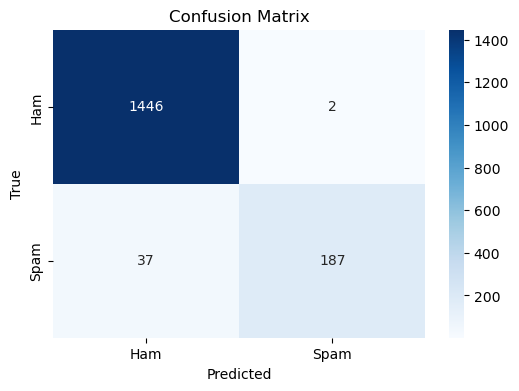

In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Step 8: Analyze Misclassified Examples (Optional)
data['predicted'] = model.predict(vectorizer.transform(data['message']))
misclassified = data[data['label'] != data['predicted']]
print("\nSample Misclassified Messages:")
print(misclassified[['message', 'label', 'predicted']].head())

# Step 9: Save the Model (Optional)
import pickle
with open('spam_detector_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save the TfidfVectorizer
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)



Sample Misclassified Messages:
                                               message  label  predicted
5    FreeMsg Hey there darling it's been 3 week's n...      1          0
54   SMS. ac Sptv: The New Jersey Devils and the De...      1          0
68   Did you hear about the new \Divorce Barbie\"? ...      1          0
226  Will u meet ur dream partner soon? Is ur caree...      1          0
659  88800 and 89034 are premium phone services cal...      1          0
